# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
  
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | muskogee
Processing Record 2 of Set 1 | san antonio de pale
Processing Record 3 of Set 1 | oranjemund
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | tobol'sk
Processing Record 6 of Set 1 | lihue
Processing Record 7 of Set 1 | boyolangu
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | nagqu
Processing Record 10 of Set 1 | labrador city
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | touros
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | saint marys
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | karkira
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | itupiranga
Processi

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,muskogee,35.5834,-95.3336,24.12,79,0,4.63,US,1726542236
1,san antonio de pale,-1.4014,5.6325,24.53,85,100,6.71,GQ,1726542237
2,oranjemund,-28.5500,16.4333,11.48,93,29,3.95,NA,1726542238
3,invercargill,-46.4000,168.3500,7.23,67,91,4.02,NZ,1726542240
4,tobol'sk,58.2000,68.2667,7.84,64,0,2.29,RU,1726542241


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muskogee,35.5834,-95.3336,24.12,79,0,4.63,US,1726542236
1,san antonio de pale,-1.4014,5.6325,24.53,85,100,6.71,GQ,1726542237
2,oranjemund,-28.5500,16.4333,11.48,93,29,3.95,NaN,1726542238
3,invercargill,-46.4000,168.3500,7.23,67,91,4.02,NZ,1726542240
4,tobol'sk,58.2000,68.2667,7.84,64,0,2.29,RU,1726542241


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

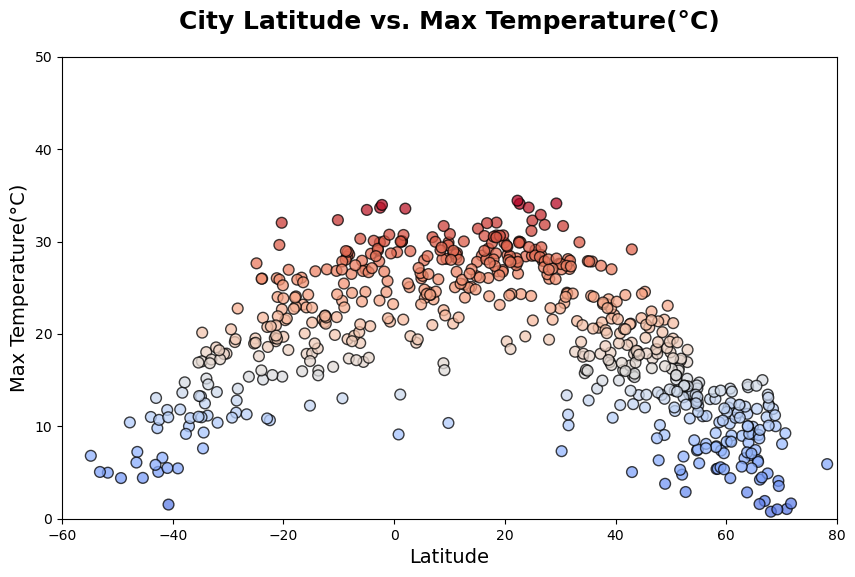

In [11]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors='black', alpha=0.75, c=city_data_df['Max Temp'], cmap='coolwarm', s=60)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature(°C)',fontsize=18,fontweight='bold', pad=20)
plt.xlabel('Latitude',fontsize=14)
plt.ylabel('Max Temperature(°C)',fontsize=14)

plt.xlim(-60,80)
plt.ylim(0,50 )


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

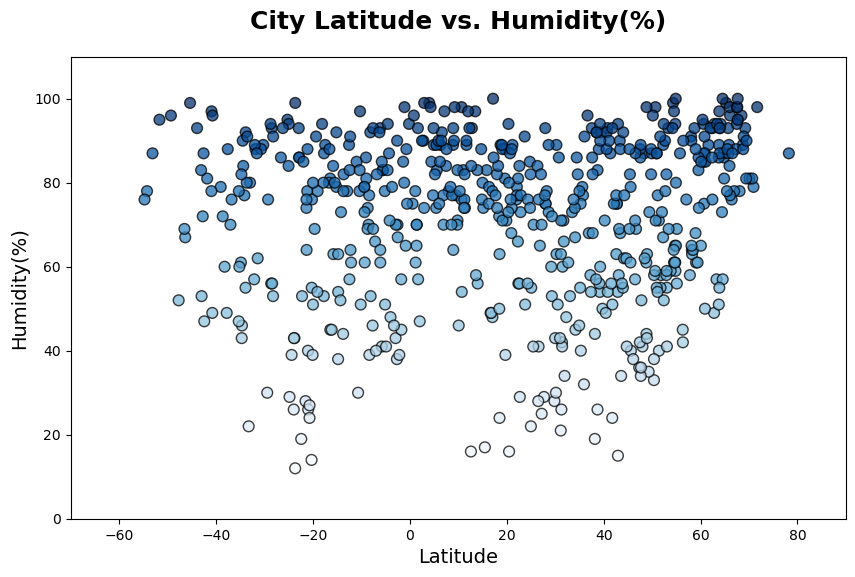

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors='black', alpha=0.75, c=city_data_df['Humidity'], cmap='Blues', s=60)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity(%)',fontsize=18,fontweight='bold', pad=20)
plt.xlabel('Latitude',fontsize=14)
plt.ylabel('Humidity(%)',fontsize=14)

plt.xlim(-70, 90)
plt.ylim(0, 110)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

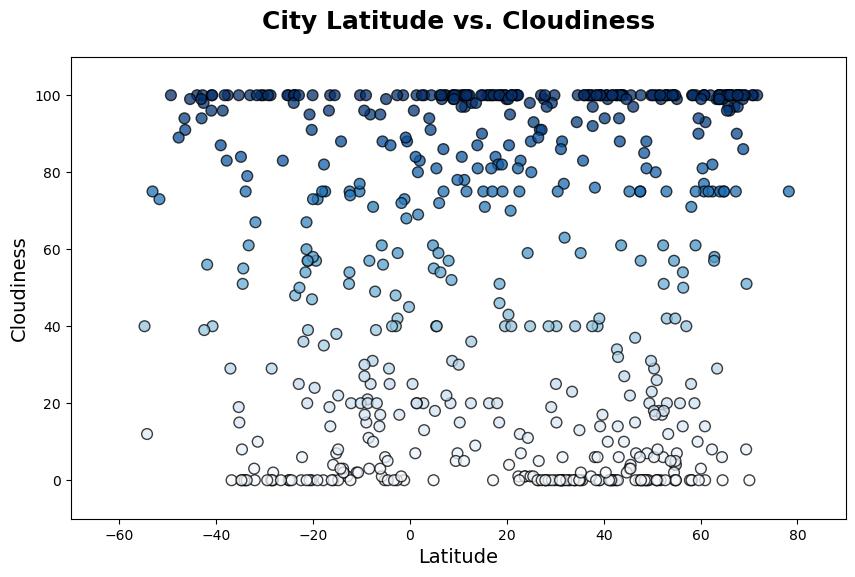

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black', alpha=0.75, c=city_data_df['Cloudiness'], cmap='Blues', s=60)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness',fontsize=18,fontweight='bold', pad=20)
plt.xlabel('Latitude',fontsize=14)
plt.ylabel('Cloudiness',fontsize=14)

plt.xlim(-70, 90)
plt.ylim(-10, 110)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

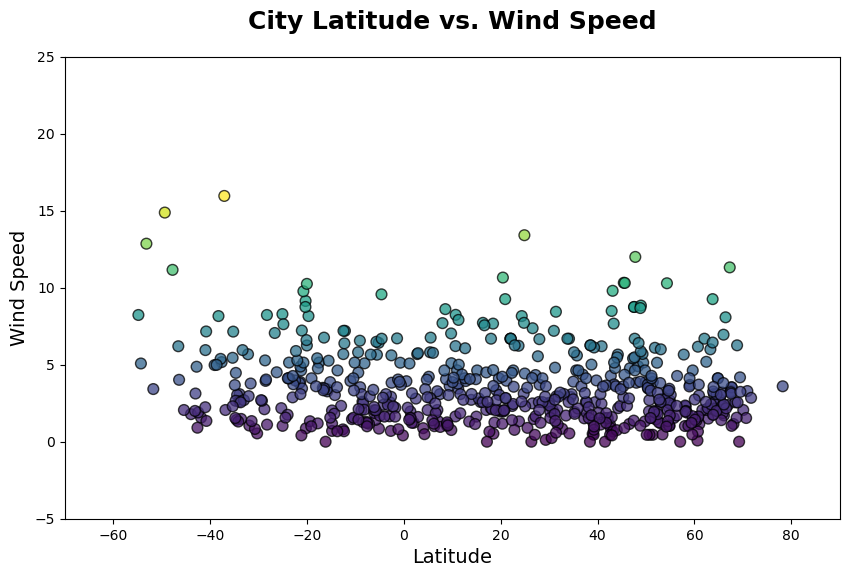

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors='black', alpha=0.75, c=city_data_df['Wind Speed'], cmap='viridis', s=60)


# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed',fontsize=18,fontweight='bold', pad=20)
plt.xlabel('Latitude',fontsize=14)
plt.ylabel('Wind Speed',fontsize=14)

plt.xlim(-70, 90)
plt.ylim(-5, 25)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x,y,xlable='X-axis',ylabel='Y-axis', title='Linear Regression plots'):
    plt.scatter(x,y,color="blue",label='')



In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muskogee,35.5834,-95.3336,24.12,79,0,4.63,US,1726542236
4,tobol'sk,58.2000,68.2667,7.84,64,0,2.29,RU,1726542241
5,lihue,21.9789,-159.3672,27.77,76,100,6.69,US,1726542242
8,nagqu,31.5000,92.0000,10.11,60,6,2.95,CN,1726542245
9,labrador city,52.9463,-66.9114,16.95,82,75,2.57,CA,1726542246


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,san antonio de pale,-1.4014,5.6325,24.53,85,100,6.71,GQ,1726542237
2,oranjemund,-28.5500,16.4333,11.48,93,29,3.95,NaN,1726542238
3,invercargill,-46.4000,168.3500,7.23,67,91,4.02,NZ,1726542240
6,boyolangu,-8.1181,111.8935,28.61,53,25,5.09,ID,1726542243
7,blackmans bay,-43.0167,147.3167,13.07,53,94,3.13,AU,1726542244


###  Temperature vs. Latitude Linear Regression Plot

The R^2-value is: 0.6491604968988368
y = -0.34x +31.65


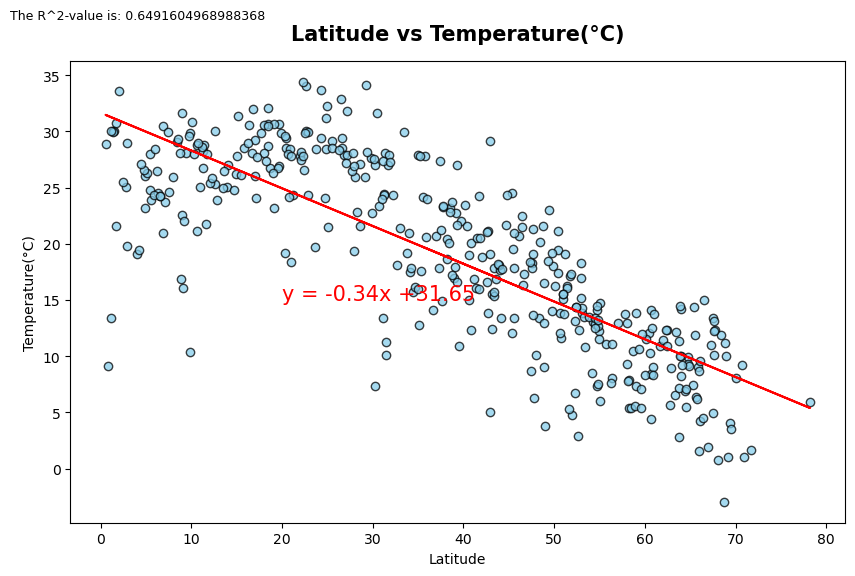

In [80]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat'].values
y_values = northern_hemi_df['Max Temp'].values


slope, intercept = np.polyfit(x_values, y_values, 1)
regress_values = x_values*slope + intercept

r_value = northern_hemi_df['Lat'].corr(northern_hemi_df['Max Temp'])
print(f"The R^2-value is: {r_value**2}")


line_eq = "y = " +str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,color='skyblue',edgecolors='black', alpha=0.75)
plt.plot(x_values, regress_values,"r")
plt.xlabel('Latitude')
plt.ylabel('Temperature(°C)')
plt.annotate(line_eq,(20,15),fontsize=15,color='red')
plt.title(f"Latitude vs Temperature(°C)",fontsize=15,fontweight='bold', pad=15)
plt.text(-10,40, (f"The R^2-value is: {r_value**2}"), fontsize=9, color='black')

plt.show()




The R^2-value is: 0.6513326281017283
y = 0.43x +28.28


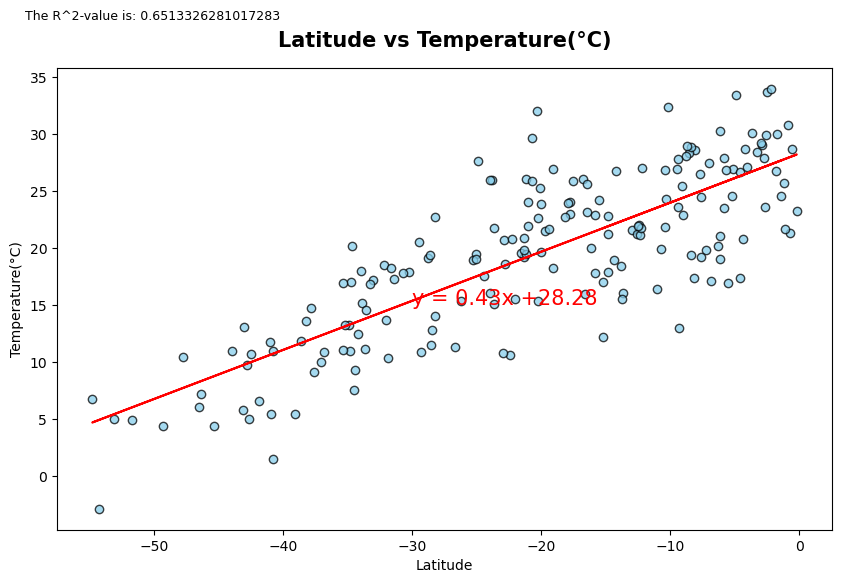

In [79]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat'].values
y_values = southern_hemi_df['Max Temp'].values


slope, intercept = np.polyfit(x_values, y_values, 1)
regress_values = x_values*slope + intercept

r_value = southern_hemi_df['Lat'].corr(southern_hemi_df['Max Temp'])
print(f"The R^2-value is: {r_value**2}")


line_eq = "y = " +str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,color='skyblue',edgecolors='black', alpha=0.75)
plt.plot(x_values, regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Temperature(°C)')
plt.annotate(line_eq,(-30,15),fontsize=15,color='red')
plt.title(f"Latitude vs Temperature(°C)",fontsize=15,fontweight='bold', pad=15)
plt.text(-60,40, (f"The R^2-value is: {r_value**2}"), fontsize=9, color='black')

plt.show()


**Discussion about the linear relationship:** The linear regression results show the relationship between latidude and temperature. In Northern Hemisphere, the temperature decreses by 0.34°C for every degree increase in latitude. In Sorthern Hemisphere, the temperature increases by 0.43°C for every degree decrease in latitude.The r^2 values between Northern and Southern Hemisphere are almost the same(0.65),indicating that 65% of the temperature variation is explained by latitude.The southern Hemisphere shows a steeper tempeature change, indicating there is other factors affecting the results.

### Humidity vs. Latitude Linear Regression Plot

The R^2-value is: 0.004811922239083443
y = 0.07x +69.87


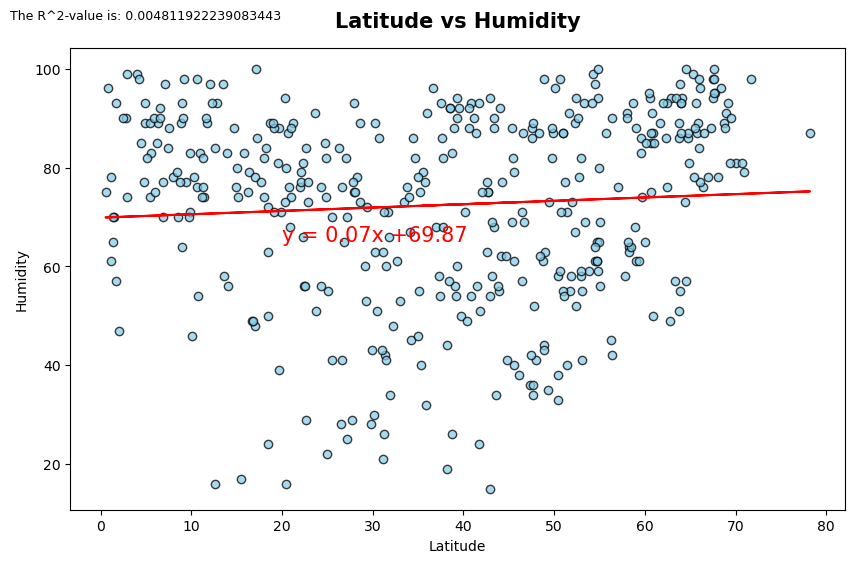

In [78]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat'].values
y_values = northern_hemi_df['Humidity'].values

slope, intercept = np.polyfit(x_values, y_values, 1)
regress_values = x_values*slope + intercept

r_value = northern_hemi_df['Lat'].corr(northern_hemi_df['Humidity'])
print(f"The R^2-value is: {r_value**2}")

line_eq = "y = " +str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,color='skyblue',edgecolors='black', alpha=0.75)
plt.plot(x_values, regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,65),fontsize=15,color='red')
plt.title(f"Latitude vs Humidity",fontsize=15,fontweight='bold', pad=15)
plt.text(-10,110, (f"The R^2-value is: {r_value**2}"), fontsize=9, color='black')

plt.show()


The R^2-value is: 0.005595232544127172
y = -0.11x +66.99


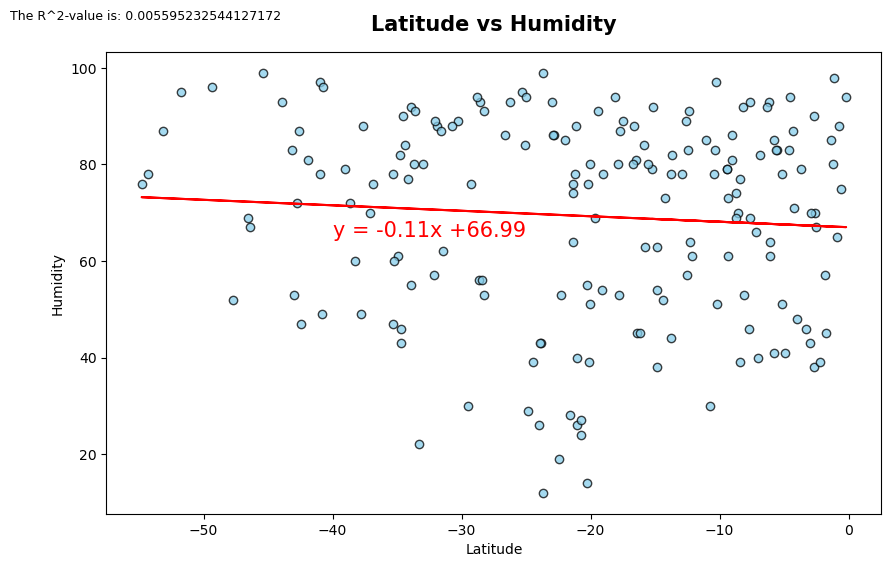

In [77]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat'].values
y_values = southern_hemi_df['Humidity'].values

slope, intercept = np.polyfit(x_values, y_values, 1)
regress_values = x_values*slope + intercept

r_value = southern_hemi_df['Lat'].corr(southern_hemi_df['Humidity'])
print(f"The R^2-value is: {r_value**2}")

line_eq = "y = " +str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,color='skyblue',edgecolors='black', alpha=0.75)
plt.plot(x_values, regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-40,65),fontsize=15,color='red')
plt.title(f"Latitude vs Humidity",fontsize=15,fontweight='bold', pad=15)
plt.text(-65,110, (f"The R^2-value is: {r_value**2}"), fontsize=9, color='black')


plt.show()

Discussion about the linear relationship: The linear regression results indication that the latitude has a tiny effect on humidity.The slope of 0.77 and -0.11 are small, indicating that latitude countributes minimally to Humidity changes.The low R^2 values for both hemispheres indicate the linear model does not fit the data well and there are other factors should be considered.

### Cloudiness vs. Latitude Linear Regression Plot

The R^2-value is: 6.714556820395359e-06
y = -0.01x +57.52


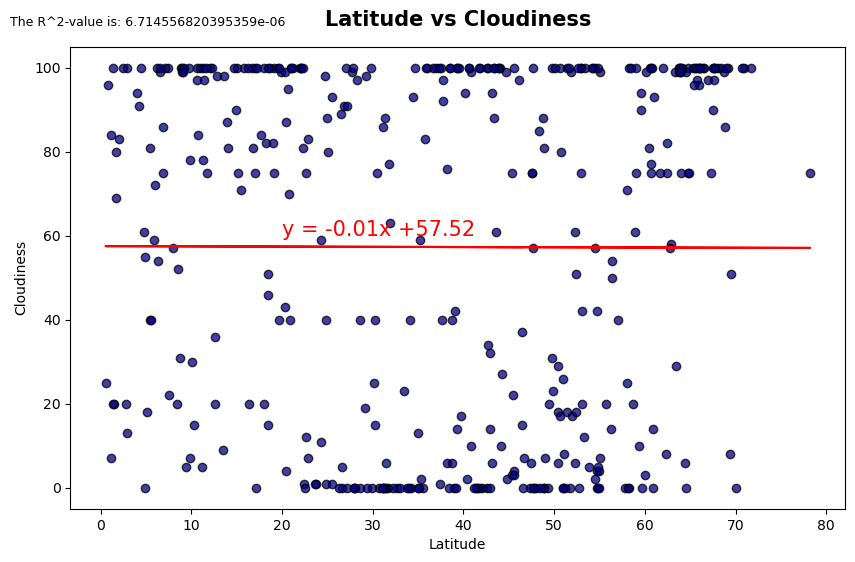

In [81]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat'].values
y_values = northern_hemi_df['Cloudiness'].values

slope, intercept = np.polyfit(x_values, y_values, 1)
regress_values = x_values*slope + intercept

r_value = northern_hemi_df['Lat'].corr(northern_hemi_df['Cloudiness'])
print(f"The R^2-value is: {r_value**2}")


line_eq = "y = " +str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,color='darkblue',edgecolors='black', alpha=0.75)
plt.plot(x_values, regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,60),fontsize=15,color='red')
plt.title(f"Latitude vs Cloudiness",fontsize=15,fontweight='bold', pad=15)
plt.text(-10,110, (f"The R^2-value is: {r_value**2}"), fontsize=9, color='black')

plt.show()

The R^2-value is: 0.05456350559368042
y = -0.66x +33.97


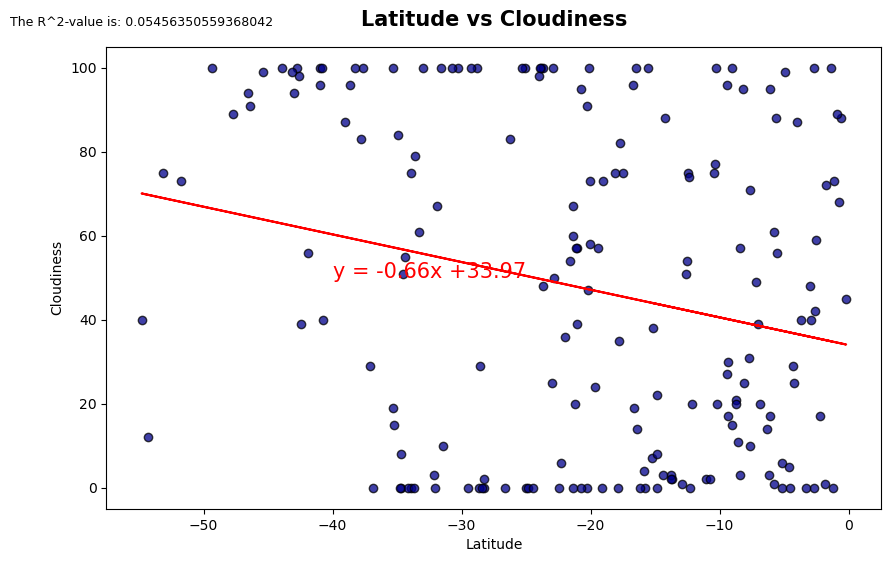

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat'].values
y_values = southern_hemi_df['Cloudiness'].values

slope, intercept = np.polyfit(x_values, y_values, 1)
regress_values = x_values*slope + intercept

r_value = southern_hemi_df['Lat'].corr(southern_hemi_df['Cloudiness'])
print(f"The R^2-value is: {r_value**2}")

line_eq = "y = " +str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,color='darkblue',edgecolors='black', alpha=0.75)
plt.plot(x_values, regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-40,50),fontsize=15,color='red')
plt.title(f"Latitude vs Cloudiness",fontsize=15,fontweight='bold', pad=15)
plt.text(-65,110, (f"The R^2-value is: {r_value**2}"), fontsize=9, color='black')


plt.show()

**Discussion about the linear relationship: The r^2-value for the Northern Hemisphere is quite low, indicating that latitude has minimal effect on cloudiness. While the r^2-value for the Southern Hemisphere is slightly higher, it still suggests a limited impact. Both results indicate that other factors should be considered to better understand cloudiness.


### Wind Speed vs. Latitude Linear Regression Plot

The R^2-value is: 0.0023408513045012815
y = -0.01x +3.51


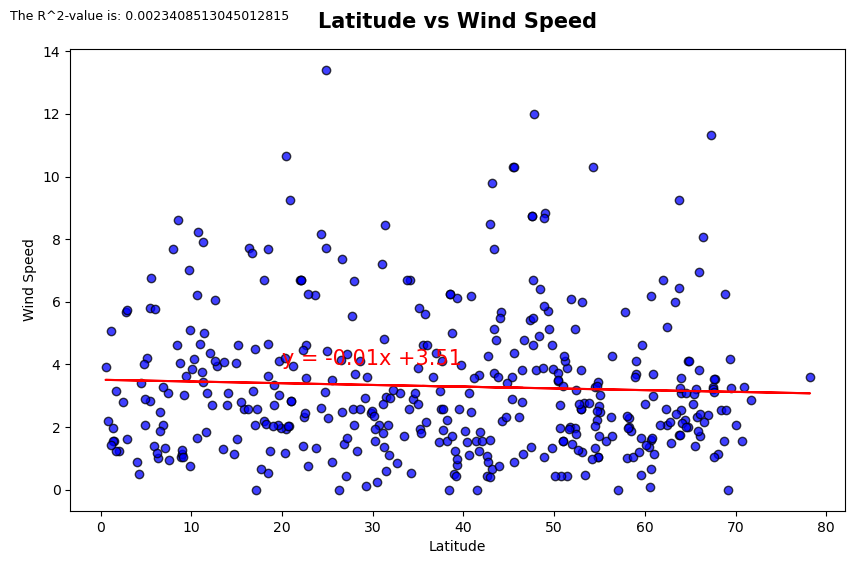

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat'].values
y_values = northern_hemi_df['Wind Speed'].values

slope, intercept = np.polyfit(x_values, y_values, 1)
regress_values = x_values*slope + intercept


r_value = northern_hemi_df['Lat'].corr(northern_hemi_df['Wind Speed'])
print(f"The R^2-value is: {r_value**2}")

line_eq = "y = " +str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,color='blue',edgecolors='black', alpha=0.75)
plt.plot(x_values, regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,4),fontsize=15,color='red')
plt.title(f"Latitude vs Wind Speed",fontsize=15,fontweight='bold', pad=15)
plt.text(-10,15, (f"The R^2-value is: {r_value**2}"), fontsize=9, color='black')

plt.show()

The R^2-value is: 0.05585585693819382
y = -0.05x +2.91


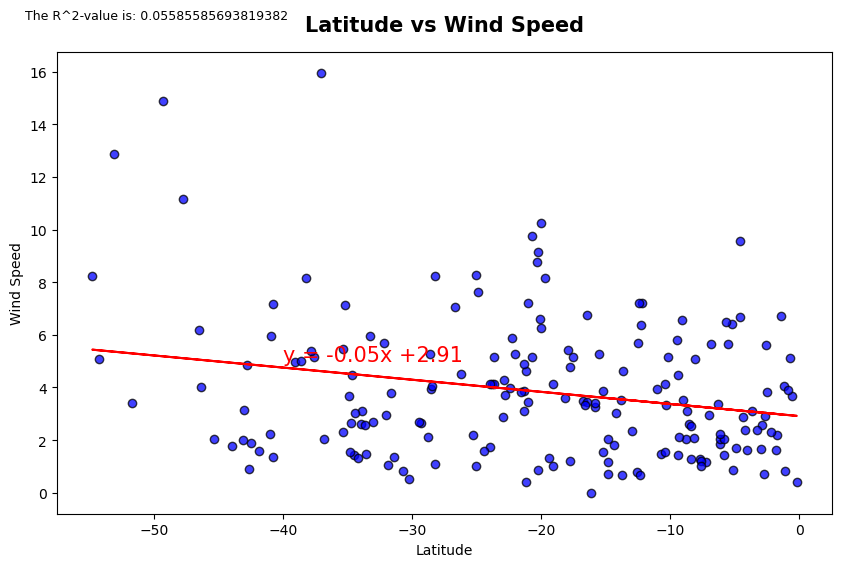

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat'].values
y_values = southern_hemi_df['Wind Speed'].values

slope, intercept = np.polyfit(x_values, y_values, 1)
regress_values = x_values*slope + intercept

r_value = southern_hemi_df['Lat'].corr(southern_hemi_df['Wind Speed'])
print(f"The R^2-value is: {r_value**2}")


line_eq = "y = " +str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,color='blue',edgecolors='black', alpha=0.75)
plt.plot(x_values, regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-40,5),fontsize=15,color='red')
plt.title(f"Latitude vs Wind Speed",fontsize=15,fontweight='bold', pad=15)
plt.text(-60,18, (f"The R^2-value is: {r_value**2}"), fontsize=9, color='black')

plt.show()

**Discussion about the linear relationship:** The R^2 values for northern and southern hemospheres are 0.0023 and 0.0559, indicating the latitude has a very limited impact on the wind speed. there are other factors need to be considered.